### General Functions

In [1]:
import pandas as pd
import numpy as np

https://pandas.pydata.org/docs/reference/general_functions.html

1 melt

The pandas.melt function is used to transform a DataFrame from a wide format (where each column represents a different variable) into a long format (where each variable is placed in a single column). This is often useful when you want to analyze data with multiple variables that can be represented as one column instead of separate ones.

Parameters:
- frame: The DataFrame you want to melt.

- id_vars: Columns to use as identifier variables (not melted). You can specify one or multiple columns.

- value_vars: Columns to unpivot. If not specified, it will use all columns that are not listed as id_vars.

- var_name: The name of the "variable" column. By default, it's either frame.columns.name or 'variable'.

- value_name: The name of the "value" column. This will hold the values from the unpivoted columns. The default is 'value'.

- col_level: If the DataFrame has a MultiIndex for columns, this specifies which level to melt.

- ignore_index: If True (default), the index is ignored and replaced with a new integer-based index. If False, the original index is kept.

In [3]:
# Create the DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Math': [90, 80],
    'English': [85, 88],
    'Science': [92, 75]
})

In [4]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Math', 'English', 'Science'],
                    var_name='Subject', value_name='Score')
melted_df

,Name,Subject,Score
0,Alice,Math,90
1,Bob,Math,80
2,Alice,English,85
3,Bob,English,88
4,Alice,Science,92
5,Bob,Science,75


In [5]:
melted_df.dtypes

Name       object
Subject    object
Score       int64
dtype: object

In [3]:
df = pd.DataFrame({
    ('Math', 'Term1'): [90, 80],
    ('Math', 'Term2'): [85, 79],
    ('English', 'Term1'): [88, 91],
    ('English', 'Term2'): [92, 86]
}, index=['Alice', 'Bob'])

# Melt the DataFrame with a MultiIndex column
melted_df = pd.melt(df.reset_index(), id_vars=['index'], col_level=0, var_name='Subject_Term', value_name='Score')
melted_df

,index,Subject_Term,Score
0,Alice,Math,90
1,Bob,Math,80
2,Alice,Math,85
3,Bob,Math,79
4,Alice,English,88
5,Bob,English,91
6,Alice,English,92
7,Bob,English,86


2 pivot

The pandas.pivot function reshapes the data in a DataFrame by rearranging it based on unique values from specified columns, allowing you to create a "pivot table." The values from one column are transformed into the new frame's columns, and the rows are indexed by one or more columns. This function is typically used for restructuring data when you want to pivot it into a more accessible format for analysis.

Parameters:
- data: The DataFrame you want to pivot.

- columns: The column(s) that will be used to form the new columns in the resulting DataFrame.

- index: The column(s) that will be used to form the new index (rows) of the DataFrame. If not provided, the - current index is used.

- values: The column(s) whose values will populate the new DataFrame's values. If not specified, all columns not used in index and columns will be included in the result.

In [6]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Bob'],
    'Subject': ['Math', 'Math', 'English', 'English'],
    'Score': [90, 80, 85, 88]
})

# Pivot the DataFrame
pivoted_df = pd.pivot(df, index='Name', columns='Subject', values='Score')

pivoted_df

Subject,English,Math
Name,,
Alice,85,90
Bob,88,80


In [7]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Bob'],
    'Subject': ['Math', 'Math', 'English', 'English'],
    'Term': ['Term1', 'Term1', 'Term1', 'Term1'],
    'Score': [90, 80, 85, 88],
    'Grade': ['A', 'B', 'B', 'A']
})

# Pivot the DataFrame with multiple values columns
pivoted_df = pd.pivot(df, index='Name', columns=['Subject', 'Term'], values=['Score', 'Grade'])

pivoted_df

Score         Grade        
Subject  Math English  Math English
Term    Term1   Term1 Term1   Term1
Name                               
Alice      90      85     A       B
Bob        80      88     B       A

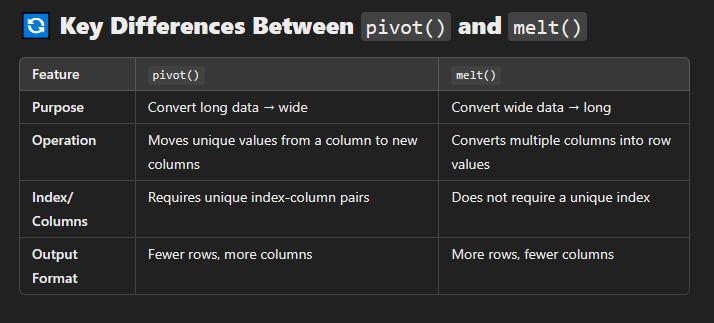

3 crosstab

The pandas.crosstab() function creates a cross-tabulation (contingency table) of two or more categorical variables, summarizing their frequency or applying aggregation functions.

Parameters:
- index:	The rows (categorical variable or list of variables).
- columns:	The columns (categorical variable or list of variables).
- values:	Array to aggregate (requires aggfunc).
- aggfunc:	Function to aggregate (sum, mean, count, etc.).
- margins:	If True, adds row/column totals (subtotals).
- normalize:	If True, normalizes the table (proportions instead of counts).

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None,
                aggfunc=None, margins=False, margins_name='All', 
                dropna=True, normalize=False)

In [9]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B']
}

df = pd.DataFrame(data)

In [10]:
# Create crosstab
table = pd.crosstab(df['Gender'], df['Preference'])
table

Preference,A,B
Gender,,
Female,1,2
Male,2,1


In [20]:
df.groupby("Gender").value_counts()

Gender  Preference
Female  B             2
        A             1
Male    A             2
        B             1
Name: count, dtype: int64

In [22]:
# Adding Totals (margins=True)
table = pd.crosstab(df['Gender'], df['Preference'], margins=True)
table

Preference,A,B,All
Gender,,,
Female,1,2,3
Male,2,1,3
All,3,3,6


In [ ]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B'],
    'Score': [80, 75, 90, 85, 70, 95]
}

df = pd.DataFrame(data)

# Compute average scores per category
table = pd.crosstab(df['Gender'], df['Preference'], values = df['Score'], aggfunc='mean')
table

Preference,A,B
Gender,,
Female,85.0,85.0
Male,85.0,70.0


In [24]:
table = pd.crosstab(df['Gender'], df['Preference'], normalize=True)
table

Preference,A,B
Gender,,
Female,0.166667,0.333333
Male,0.333333,0.166667


- Summarizing categorical data (e.g., survey responses, customer preferences).
- Computing frequency distributions.
- Performing contingency table analysis (e.g., Chi-square test).
- Normalizing data to compare proportions.

4 cut

Parameters:
- x:	The data to be binned (array-like or Series).

- bins:	The number of bins or an explicit list of bin edges.

- right: (default: True)	If True, bins are right-inclusive (1,2] (includes 2 but not 1).

- labels: (default: None)	The labels for the bins. If False, it returns integer bin indices.

- retbins: (default: False)	If True, returns the bin edges along with the binned output.

- precision: (default: 3)	Number of decimal places to store bin labels.

- include_lowest: (default: False)	If True, includes the lowest value in the first bin.

- duplicates: (default: 'raise')	Handles duplicate bin edges: 'raise' (error) or 'drop' (remove).

- ordered: (default: True)	If False, treats labels as unordered categorical values.

pandas.cut() - Convert Continuous Data into Bins (Categories)

The cut() function divides continuous numerical data into discrete bins (categories). It’s useful for transforming numerical data into categorical groups.

In [25]:
ages = [5, 12, 20, 25, 30, 40, 50, 60, 70, 80]
bins = [0, 18, 35, 55, 100]  # Define bin edges
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Labels for bins


age_groups = pd.cut(ages, bins=bins, labels=labels)
age_groups

['Child', 'Child', 'Young Adult', 'Young Adult', 'Young Adult', 'Adult', 'Adult', 'Senior', 'Senior', 'Senior']
Categories (4, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior']

In [27]:
values = [2, 5, 10, 15, 20, 25, 30]
binned_values = pd.cut(values, bins=3)  # 3 equal-width bins
binned_values

[(1.972, 11.333], (1.972, 11.333], (1.972, 11.333], (11.333, 20.667], (11.333, 20.667], (20.667, 30.0], (20.667, 30.0]]
Categories (3, interval[float64, right]): [(1.972, 11.333] < (11.333, 20.667] < (20.667, 30.0]]

In [29]:
# Sample DataFrame with employee salaries
df = pd.DataFrame({
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Salary': [2500, 4000, 6000, 7500, 10000, 12000, 15000]
})

# Define salary bins and labels
bins = [0, 3000, 7000, 10000, 20000]  # Salary ranges
labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize salaries into bins
df['Salary Category'] = pd.cut(df['Salary'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame
df


,Employee,Salary,Salary Category
0,Alice,2500,Low
1,Bob,4000,Medium
2,Charlie,6000,Medium
3,David,7500,High
4,Eve,10000,High
5,Frank,12000,Very High
6,Grace,15000,Very High


In [7]:
data = pd.Series([5, 12, 15, 24, 32, 40, 55, 60, 72, 100])

# Divide data into 4 equal-sized quantiles (quartiles)
quantiles = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
quantiles

0    Q1
1    Q1
2    Q1
3    Q2
4    Q2
5    Q3
6    Q3
7    Q4
8    Q4
9    Q4
dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [6]:
# Sample DataFrame with employee salaries
df = pd.DataFrame({
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Salary': [2500, 4000, 6000, 7500, 10000, 12000, 15000]
})

# Define salary bins and labels
labels = ['Low', 'Medium']

# Categorize salaries into bins
df['Salary Category'] = pd.qcut(df['Salary'],q=2, labels=labels)

# Display the DataFrame
df


,Employee,Salary,Salary Category
0,Alice,2500,Low
1,Bob,4000,Low
2,Charlie,6000,Low
3,David,7500,Low
4,Eve,10000,Medium
5,Frank,12000,Medium
6,Grace,15000,Medium


5 merge

merged_df = pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, 
                     left_index=False, right_index=False, sort=False, 
                     suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)


Parameters:

- left, right: The DataFrames (or named Series) to merge.

- how (default: 'inner'): Specifies the type of merge:
    - 'inner' → Intersection of keys (only common values).
    - 'left' → All keys from the left DataFrame, matching with the right (SQL left join).
    - 'right' → All keys from the right DataFrame, matching with the left (SQL right join).
    - 'outer' → Union of keys (all values from both DataFrames).
    - 'cross' → Cartesian product (combines every row from left with every row from right).
    
- on: Column(s) to merge on (must be in both DataFrames).
left_on, right_on: Use different column names from left and right DataFrames to merge.
left_index, right_index: Use index as the join key instead of columns.
suffixes=('_x', '_y'): Suffixes for duplicate column names from left and right DataFrames.

- indicator: If True, adds a column _merge showing the source of each row ('left_only', 'right_only', 'both').

- validate: Ensures the merge follows a specific relationship (e.g., "1:1", "1:m", "m:1").

In [7]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [90, 85, 78]})


In [8]:
merged = pd.merge(df1, df2, on='ID', how='inner')
merged

,ID,Name,Score
0,2,Bob,90
1,3,Charlie,85


In [9]:
merged = pd.merge(df1, df2, on='ID', how='left')
merged

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,90.0
2,3,Charlie,85.0


In [11]:
merged = pd.merge(df1, df2, on='ID', how='outer',indicator=True)
merged

,ID,Name,Score,_merge
0,1,Alice,NaN,left_only
1,2,Bob,90.0,both
2,3,Charlie,85.0,both
3,4,NaN,78.0,right_only


In [17]:
df1 = pd.DataFrame({'A_ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'B_ID': [2, 3, 4], 'Score': [90, 85, 78]})

In [ ]:

merged = pd.merge(df1, df2, left_on='A_ID', right_on='B_ID', how='inner')
merged

,A_ID,Name,B_ID,Score
0,2,Bob,2,90
1,3,Charlie,3,85


In [20]:
merged = pd.merge(df2,df1, left_on='B_ID', right_on='A_ID',suffixes=('_left', '_right'))
merged

,B_ID,Score,A_ID,Name
0,2,90,2,Bob
1,3,85,3,Charlie


pandas.merge_ordered is useful for merging ordered data, such as time series or datasets with chronological records. It is particularly handy when you need to align data from two sources while maintaining order and optionally filling missing values using forward fill (ffill).

Parameter from pandas.merge-order:

- left: DataFrame or named Series
- right: DataFrame or named Series
- on: label or list Field names to join on. Must be found in both DataFrames.
- left_on: label or list, or array-like
    Field names to join on in left DataFrame. Can be a vector or list of vectors of the length of the DataFrame to use a particular vector as the join key instead of columns.
- right_on: label or list, or array-like
    Field names to join on in right DataFrame or vector/list of vectors per left_on docs.
- left_by: column name or list of column names
    Group left DataFrame by group columns and merge piece by piece with right DataFrame. Must be None if either left or right are a Series.

- right_by: column name or list of column names
    Group right DataFrame by group columns and merge piece by piece with left DataFrame. Must be None if either left or right are a Series.
- fill_method:
{‘ffill’, None}, default None
Interpolation method for data.

- suffixes:list-like, default is (“_x”, “_y”)
    A length-2 sequence where each element is optionally a string indicating the suffix to add to overlapping column names in left and right respectively. Pass a value of None instead of a string to indicate that the column name from left or right should be left as-is, with no suffix. At least one of the values must not be None.

- how: {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘outer’

    - left: use only keys from left frame (SQL: left outer join)

    - right: use only keys from right frame (SQL: right outer join)

    - outer: use union of keys from both frames (SQL: full outer join)

    - inner: use intersection of keys from both frames (SQL: inner join).



In [ ]:
df1 = pd.DataFrame({'date': ['2024-01-01', '2024-01-03'], 'value1': [10, 30]})
df2 = pd.DataFrame({'date': ['2024-01-02', '2024-01-03'], 'value2': [20, 40]})

In [25]:
merged_df = pd.merge_ordered(df1, df2, on='date')
merged_df

,date,value1,value2
0,2024-01-01,10.0,NaN
1,2024-01-02,NaN,20.0
2,2024-01-03,30.0,40.0


In [24]:
merged_df = pd.merge(df1, df2, on='date',how='outer')
merged_df

,date,value1,value2
0,2024-01-01,10.0,NaN
1,2024-01-02,NaN,20.0
2,2024-01-03,30.0,40.0


In [27]:
merged_ffill = pd.merge_ordered(df2, df1, on='date', fill_method='ffill')
merged_ffill
#  The fill_method='ffill' ensures missing values in value1 and value2 are forward-filled.

,date,value2,value1
0,2024-01-01,NaN,10
1,2024-01-02,20.0,10
2,2024-01-03,40.0,30


pandas.merge_asof: Merging by Nearest Key Distance

pandas.merge_asof is used for merging two DataFrames by the nearest key rather than exact matches. This is particularly useful in time-series data, where timestamps may not perfectly align.

Parameter:
- Sort Requirement: Both DataFrames must be sorted by the key column.
- Nearest Match: Finds the closest match instead of requiring exact key matches.
- Three Matching Directions:
    - backward (default): Finds the last available match where right['on'] ≤ left['on'].
    - forward: Finds the first available match where right['on'] ≥ left['on'].
    - nearest: Finds the closest match in absolute distance.
        - Tolerance Control: Restricts how far apart the keys can be matched.
        - Exact Match Option: Can allow or disallow exact matches.
        - Group-wise Matching: Uses by to match within groups before searching for a match.

In [28]:
left = pd.DataFrame({'time': pd.to_datetime(['2024-01-01 10:00', '2024-01-01 10:05', '2024-01-01 10:10']),
                     'value_left': [100, 200, 300]})

right = pd.DataFrame({'time': pd.to_datetime(['2024-01-01 10:02', '2024-01-01 10:06']),
                      'value_right': [50, 60]})

In [29]:
# Merge with nearest previous time match (backward)
merged = pd.merge_asof(left, right, on='time', direction='backward')
merged

,time,value_left,value_right
0,2024-01-01 10:00:00,100,NaN
1,2024-01-01 10:05:00,200,50.0
2,2024-01-01 10:10:00,300,60.0


In [30]:
# Now, merge_asof selects the next available time in right instead of the last available one.
merged_forward = pd.merge_asof(left, right, on='time', direction='forward')
merged_forward

,time,value_left,value_right
0,2024-01-01 10:00:00,100,50.0
1,2024-01-01 10:05:00,200,60.0
2,2024-01-01 10:10:00,300,NaN


In [ ]:
# Now, merge_asof selects the next available time in right instead of the last available one.
merged_tolerance = pd.merge_asof(left, right, on='time', direction='nearest', tolerance=pd.Timedelta('3min'))
merged_tolerance

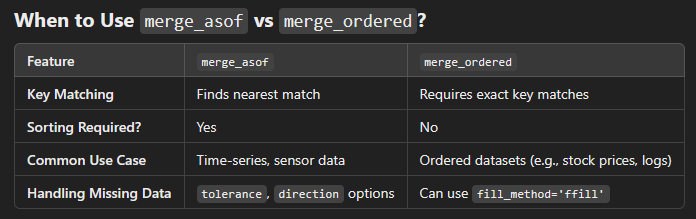

7 concat

Concatenate pandas objects along a particular axis.
Allows optional set logic along the other axes.
Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

<dl class="simple">
<dt><strong>objs</strong><span class="classifier">a sequence or mapping of Series or DataFrame objects</span></dt><dd><p>If a mapping is passed, the sorted keys will be used as the <cite>keys</cite>
argument, unless it is passed, in which case the values will be
selected (see below). Any None objects will be dropped silently unless
they are all None in which case a ValueError will be raised.</p>
</dd>
<dt><strong>axis</strong><span class="classifier">{0/’index’, 1/’columns’}, default 0</span></dt><dd><p>The axis to concatenate along.</p>
</dd>
<dt><strong>join</strong><span class="classifier">{‘inner’, ‘outer’}, default ‘outer’</span></dt><dd><p>How to handle indexes on other axis (or axes).</p>
</dd>
<dt><strong>ignore_index</strong><span class="classifier">bool, default False</span></dt><dd><p>If True, do not use the index values along the concatenation axis. The
resulting axis will be labeled 0, …, n - 1. This is useful if you are
concatenating objects where the concatenation axis does not have
meaningful indexing information. Note the index values on the other
axes are still respected in the join.</p>
</dd>
<dt><strong>keys</strong><span class="classifier">sequence, default None</span></dt><dd><p>If multiple levels passed, should contain tuples. Construct
hierarchical index using the passed keys as the outermost level.</p>
</dd>
<dt><strong>levels</strong><span class="classifier">list of sequences, default None</span></dt><dd><p>Specific levels (unique values) to use for constructing a
MultiIndex. Otherwise they will be inferred from the keys.</p>
</dd>
<dt><strong>names</strong><span class="classifier">list, default None</span></dt><dd><p>Names for the levels in the resulting hierarchical index.</p>
</dd>
<dt><strong>verify_integrity</strong><span class="classifier">bool, default False</span></dt><dd><p>Check whether the new concatenated axis contains duplicates. This can
be very expensive relative to the actual data concatenation.</p>
</dd>
<dt><strong>sort</strong><span class="classifier">bool, default False</span></dt><dd><p>Sort non-concatenation axis if it is not already aligned. One exception to
this is when the non-concatentation axis is a DatetimeIndex and join=’outer’
and the axis is not already aligned. In that case, the non-concatenation
axis is always sorted lexicographically.</p>
</dd>
<dt><strong>copy</strong><span class="classifier">bool, default True</span></dt><dd><p>If False, do not copy data unnecessarily.</p>
</dd>
</dl>

In [31]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

In [32]:
result = pd.concat([df1, df2]) 
result

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [33]:
result = pd.concat([df1, df2], ignore_index=True)
result

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


In [34]:
result = pd.concat([df1, df2],axis=1) 
result

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


In [36]:
result = pd.concat([df1, df2],join="outer") 
result

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


8 dumies

pandas.get_dummies: One-Hot Encoding for Categorical Data
pandas.get_dummies converts categorical variables into dummy/indicator variables (one-hot encoding).


<dt class="field-odd">Parameters<span class="colon">:</span></dt>
<dd class="field-odd"><dl class="simple">
<dt><strong>data</strong><span class="classifier">array-like, Series, or DataFrame</span></dt><dd><p>Data of which to get dummy indicators.</p>
</dd>
<dt><strong>prefix</strong><span class="classifier">str, list of str, or dict of str, default None</span></dt><dd><p>String to append DataFrame column names.
Pass a list with length equal to the number of columns
when calling get_dummies on a DataFrame. Alternatively, <cite>prefix</cite>
can be a dictionary mapping column names to prefixes.</p>
</dd>
<dt><strong>prefix_sep</strong><span class="classifier">str, default ‘_’</span></dt><dd><p>If appending prefix, separator/delimiter to use. Or pass a
list or dictionary as with <cite>prefix</cite>.</p>
</dd>
<dt><strong>dummy_na</strong><span class="classifier">bool, default False</span></dt><dd><p>Add a column to indicate NaNs, if False NaNs are ignored.</p>
</dd>
<dt><strong>columns</strong><span class="classifier">list-like, default None</span></dt><dd><p>Column names in the DataFrame to be encoded.
If <cite>columns</cite> is None then all the columns with
<cite>object</cite>, <cite>string</cite>, or <cite>category</cite> dtype will be converted.</p>
</dd>
<dt><strong>sparse</strong><span class="classifier">bool, default False</span></dt><dd><p>Whether the dummy-encoded columns should be backed by
a <code class="xref py py-class docutils literal notranslate"><span class="pre">SparseArray</span></code> (True) or a regular NumPy array (False).</p>
</dd>
<dt><strong>drop_first</strong><span class="classifier">bool, default False</span></dt><dd><p>Whether to get k-1 dummies out of k categorical levels by removing the
first level.</p>
</dd>
<dt><strong>dtype</strong><span class="classifier">dtype, default bool</span></dt><dd><p>Data type for new columns. Only a single dtype is allowed.</p>
</dd>
</dl>
</dd>
<dt class="field-even">Returns<span class="colon">:</span></dt>
<dd class="field-even"><dl class="simple">
<dt>DataFrame</dt><dd><p>Dummy-coded data. If <cite>data</cite> contains other columns than the
dummy-coded one(s), these will be prepended, unaltered, to the result.</p>
</dd>
</dl>
</dd>


In [38]:
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red']})

In [39]:
encoded_df = pd.get_dummies(df)
encoded_df

,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True


In [40]:
encoded_df = pd.get_dummies(df, prefix='Category')
encoded_df

,Category_Blue,Category_Green,Category_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True


In [46]:
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'M']
})

encoded_df = pd.get_dummies(df)
print(encoded_df)

   Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0       False        False       True   False   False    True
1        True        False      False   False    True   False
2       False         True      False    True   False   False
3       False        False       True   False    True   False


In [44]:
df = pd.DataFrame({'Color': ['Red', 'Blue', None, 'Green']})
encoded_df = pd.get_dummies(df, dummy_na=True)
print(encoded_df)


   Color_Blue  Color_Green  Color_Red  Color_nan
0       False        False       True      False
1        True        False      False      False
2       False        False      False       True
3       False         True      False      False


In [54]:
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'M']
})

encoded_df = pd.get_dummies(df, columns=['Color'])
print(encoded_df)

  Size  Color_Blue  Color_Green  Color_Red
0    S       False        False       True
1    M        True        False      False
2    L       False         True      False
3    M       False        False       True


In [56]:
encoded_df["Color_Blue"]

0    False
1     True
2    False
3    False
Name: Color_Blue, dtype: bool